In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('canada.csv')
df = pd.DataFrame(data)
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


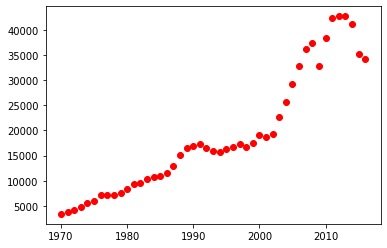

In [38]:
%matplotlib inline
plt.scatter(df['year'],df['per capita income (US$)'], color='red')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['year']]
Y = df['per capita income (US$)']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20)
model = LinearRegression()
model.fit(X_train,Y_train)
Y_predic = model.predict(X_test)

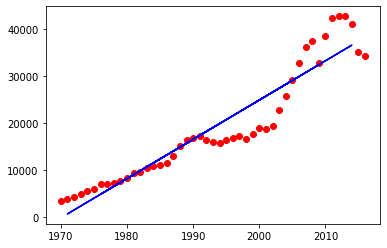

In [40]:
## AHORA GRAFICAMOS LA REGRESION OBTENIDA
plt.scatter(X,Y, color='red')
plt.plot(X_test,Y_predic, color='blue')
plt.show()


In [41]:
## ECUACION DE LA LINEA
print('La ecuacion')
print('y:', model.coef_,'X', model.intercept_)

La ecuacion
y: [834.801083] X -1644751.3105609356


In [42]:
## METRICAS _______________
model.score(X_test,Y_test)

0.9011286632078986

In [45]:
### METRICA PARA SABER QUE TAN BUENO ES MI MODELO, QUE TAN BIEN ESTA AJUSTADO
## A LOS DATOS
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_predic)
print(r2)

0.9011286632078986


In [43]:
## ERROR ABSOLUTO MEDIO
from sklearn.metrics import mean_absolute_error
EAM = mean_absolute_error(Y_test,Y_predic)
print(EAM)

3328.302153765331


In [44]:
## ERROR CUADRATICO MEDIO 

## TRAIN_TEST_SPLIT
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y_test, Y_predic)
print(MSE)

13890259.881376117


In [48]:
## VALIDACION CRUZADA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfol = KFold(n_splits=10, random_state=7, shuffle=True)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X,Y, scoring=scoring)
print(results.mean())

-35573685.94962539
